# Heatmap - Matrix Relationships

**Use Case**: Show matrix relationships (correlation matrix, confusion matrix, schedule grid)

This notebook demonstrates how to create effective heatmaps for visualizing relationships in matrix data.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Try to import sklearn for classification examples
try:
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix
    SKLEARN_AVAILABLE = True
    print("✅ scikit-learn imported successfully")
except ImportError:
    SKLEARN_AVAILABLE = False
    print("⚠️  scikit-learn not available - confusion matrix example will be simulated")
    print("   Install with: pip install scikit-learn")

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)


⚠️  scikit-learn not available - confusion matrix example will be simulated
   Install with: pip install scikit-learn


📊 Simulating confusion matrix (sklearn not available)


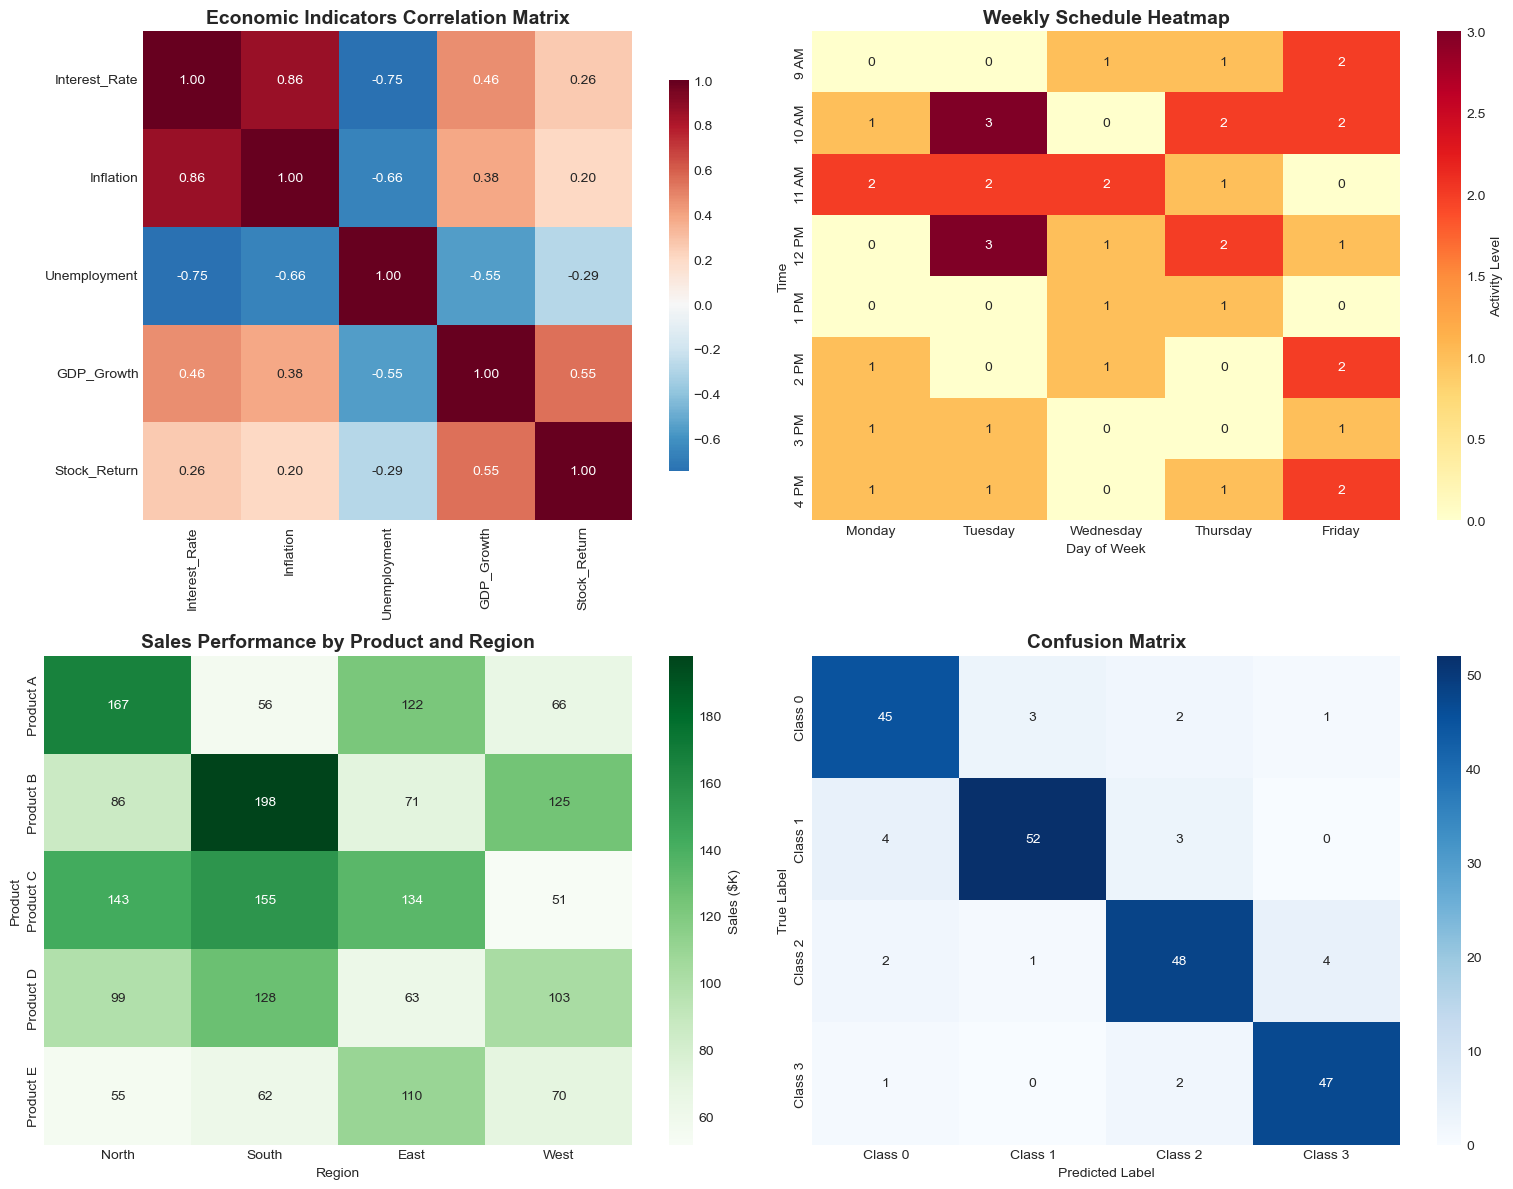

In [3]:
# Generate sample data for different heatmap types
# 1. Correlation matrix data
np.random.seed(42)
n_samples = 200

# Create correlated financial metrics
interest_rate = np.random.uniform(2, 6, n_samples)
inflation = interest_rate * 0.7 + np.random.normal(0, 0.5, n_samples)
unemployment = 8 - interest_rate * 0.8 + np.random.normal(0, 0.8, n_samples)
gdp_growth = 4 - unemployment * 0.3 + np.random.normal(0, 0.5, n_samples)
stock_return = gdp_growth * 1.5 + np.random.normal(0, 2, n_samples)

economic_data = pd.DataFrame({
    'Interest_Rate': interest_rate,
    'Inflation': inflation,
    'Unemployment': unemployment,
    'GDP_Growth': gdp_growth,
    'Stock_Return': stock_return
})

# 2. Schedule/Calendar data
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
hours = ['9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM']
schedule_data = np.random.choice([0, 1, 2, 3], size=(len(hours), len(days)), p=[0.3, 0.4, 0.2, 0.1])
schedule_df = pd.DataFrame(schedule_data, index=hours, columns=days)

# 3. Sales performance data
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
sales_matrix = np.random.uniform(50, 200, size=(len(products), len(regions)))
sales_df = pd.DataFrame(sales_matrix, index=products, columns=regions)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation heatmap
correlation_matrix = economic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=ax1)
ax1.set_title('Economic Indicators Correlation Matrix', fontsize=14, fontweight='bold')

# 2. Schedule heatmap
schedule_labels = ['Free', 'Meeting', 'Busy', 'Blocked']
sns.heatmap(schedule_df, annot=True, cmap='YlOrRd', 
            cbar_kws={'label': 'Activity Level'}, ax=ax2)
ax2.set_title('Weekly Schedule Heatmap', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Time')

# 3. Sales performance heatmap
sns.heatmap(sales_df, annot=True, cmap='Greens', fmt='.0f',
            cbar_kws={'label': 'Sales ($K)'}, ax=ax3)
ax3.set_title('Sales Performance by Product and Region', fontsize=14, fontweight='bold')
ax3.set_xlabel('Region')
ax3.set_ylabel('Product')

# 4. Confusion matrix heatmap
if SKLEARN_AVAILABLE:
    # Generate classification data
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=4, 
                              n_informative=8, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
else:
    # Create simulated confusion matrix when sklearn is not available
    print("📊 Simulating confusion matrix (sklearn not available)")
    cm = np.array([[45, 3, 2, 1],
                   [4, 52, 3, 0], 
                   [2, 1, 48, 4],
                   [1, 0, 2, 47]])
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax4)
ax4.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax4.set_xlabel('Predicted Label')
ax4.set_ylabel('True Label')

plt.tight_layout()
plt.show()


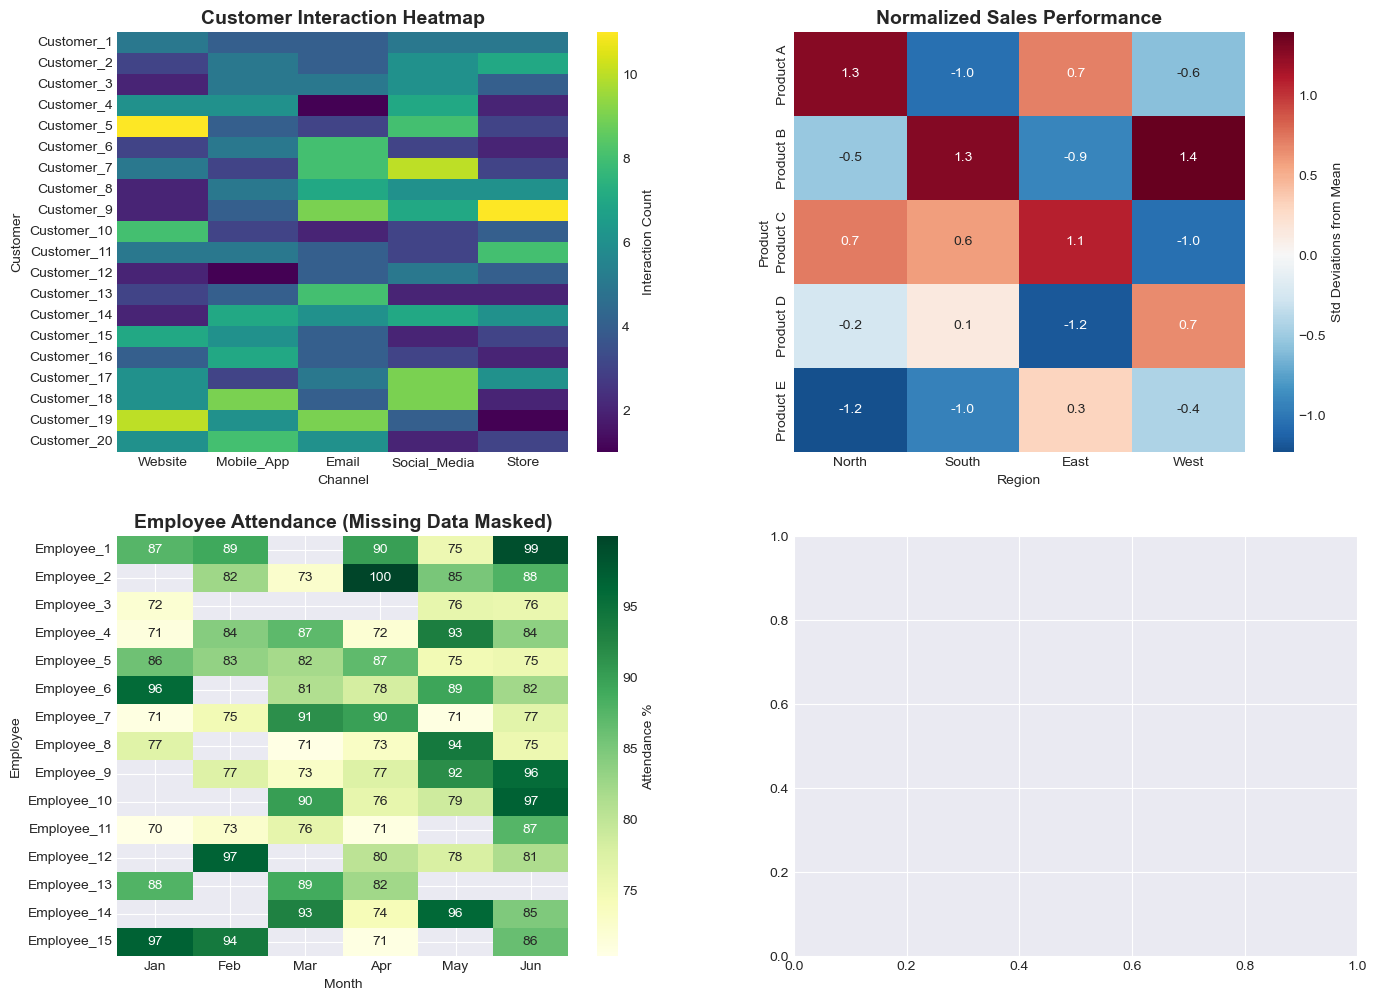

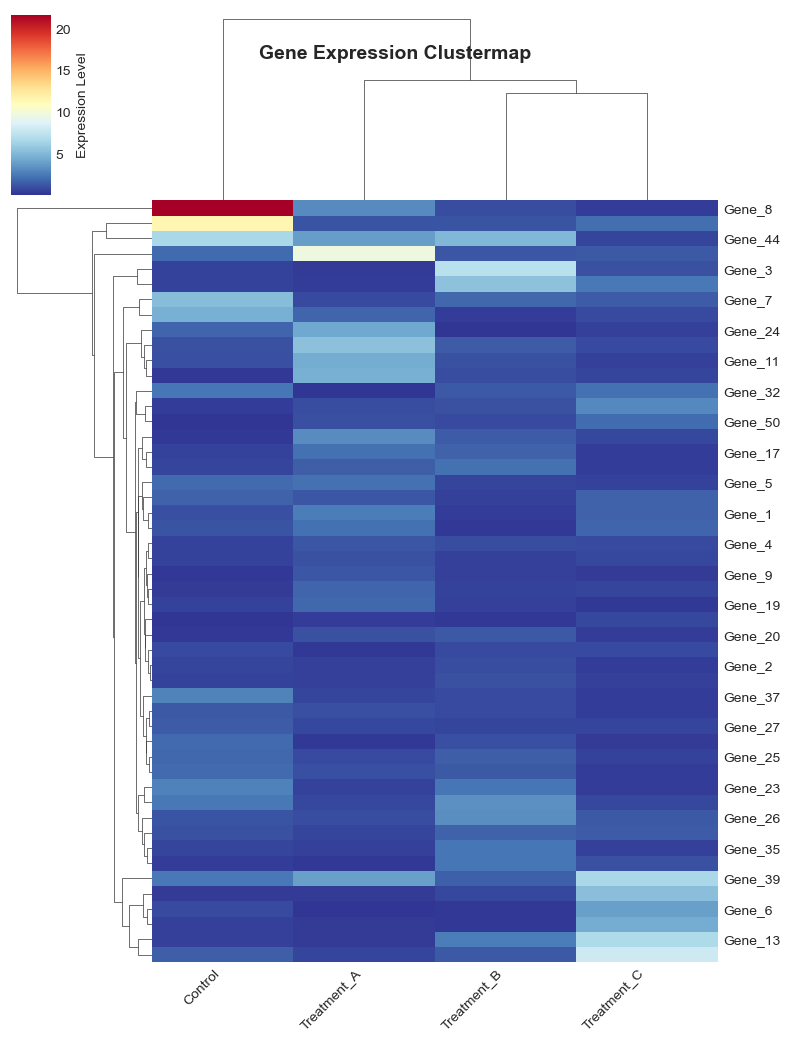

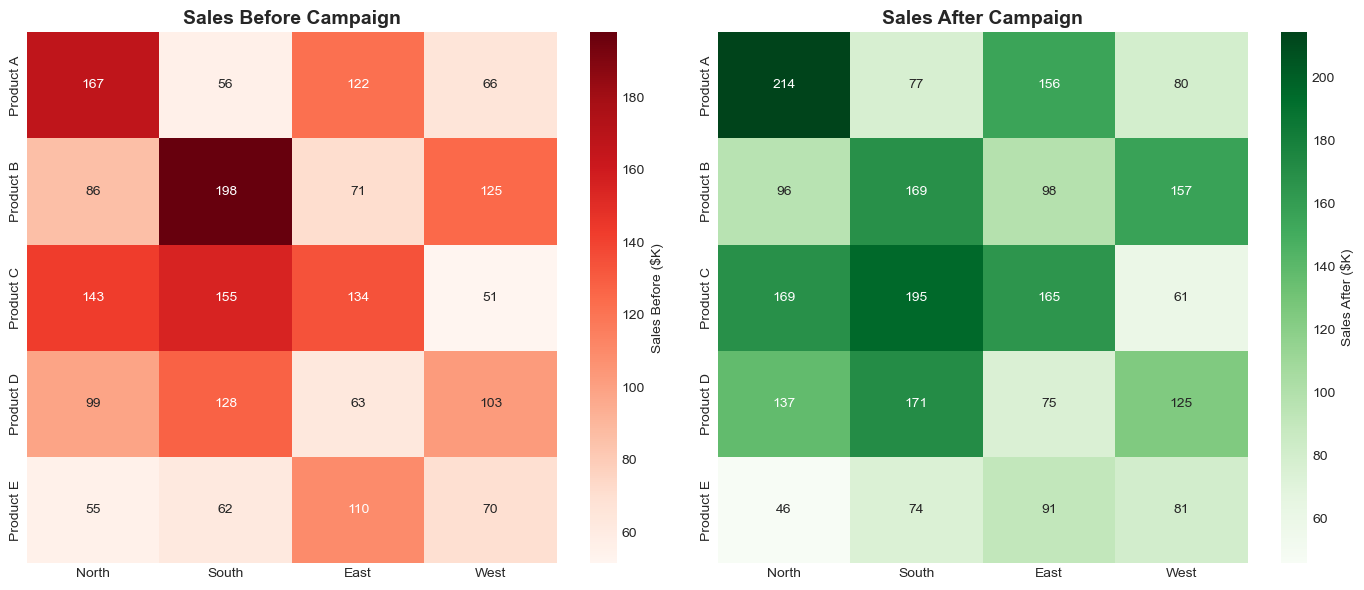

In [4]:
# Advanced heatmap techniques
# Generate more complex datasets
np.random.seed(42)

# 1. Customer behavior data
customers = [f'Customer_{i+1}' for i in range(20)]
products_behavior = ['Website', 'Mobile_App', 'Email', 'Social_Media', 'Store']
behavior_data = np.random.poisson(5, size=(len(customers), len(products_behavior)))
behavior_df = pd.DataFrame(behavior_data, index=customers, columns=products_behavior)

# 2. Gene expression-like data (clustered)
genes = [f'Gene_{i+1}' for i in range(50)]
conditions = ['Control', 'Treatment_A', 'Treatment_B', 'Treatment_C']
expression_data = np.random.lognormal(0, 1, size=(len(genes), len(conditions)))
expression_df = pd.DataFrame(expression_data, index=genes, columns=conditions)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Customer behavior with custom colors
sns.heatmap(behavior_df, cmap='viridis', cbar_kws={'label': 'Interaction Count'}, ax=ax1)
ax1.set_title('Customer Interaction Heatmap', fontsize=14, fontweight='bold')
ax1.set_xlabel('Channel')
ax1.set_ylabel('Customer')

# 2. Clustermap (hierarchical clustering)
cluster_plot = sns.clustermap(expression_df, cmap='RdYlBu_r', figsize=(8, 10),
                             cbar_kws={'label': 'Expression Level'})
plt.setp(cluster_plot.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
cluster_plot.fig.suptitle('Gene Expression Clustermap', y=0.95, fontsize=14, fontweight='bold')

# 3. Diverging heatmap (centered at 0)
# Normalize sales data to show performance relative to average
sales_normalized = (sales_df - sales_df.mean()) / sales_df.std()
sns.heatmap(sales_normalized, annot=True, cmap='RdBu_r', center=0, fmt='.1f',
            cbar_kws={'label': 'Std Deviations from Mean'}, ax=ax2)
ax2.set_title('Normalized Sales Performance', fontsize=14, fontweight='bold')
ax2.set_xlabel('Region')
ax2.set_ylabel('Product')

# 4. Masked heatmap (hide certain values)
# Create attendance data with some missing values
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
employees = [f'Employee_{i+1}' for i in range(15)]
attendance_data = np.random.uniform(70, 100, size=(len(employees), len(months)))
# Add some missing data (NaN)
mask_indices = np.random.choice(range(len(employees) * len(months)), 
                               size=20, replace=False)
attendance_flat = attendance_data.flatten()
attendance_flat[mask_indices] = np.nan
attendance_data = attendance_flat.reshape(attendance_data.shape)
attendance_df = pd.DataFrame(attendance_data, index=employees, columns=months)

# Create mask for missing values
mask = attendance_df.isnull()
sns.heatmap(attendance_df, mask=mask, annot=True, fmt='.0f', cmap='YlGn',
            cbar_kws={'label': 'Attendance %'}, ax=ax3)
ax3.set_title('Employee Attendance (Missing Data Masked)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Employee')

# 5. Multiple heatmaps comparison
fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 6))

# Before and after comparison
sales_before = sales_df.copy()
sales_after = sales_df * np.random.uniform(0.8, 1.4, size=sales_df.shape)

sns.heatmap(sales_before, annot=True, fmt='.0f', cmap='Reds',
            cbar_kws={'label': 'Sales Before ($K)'}, ax=ax5)
ax5.set_title('Sales Before Campaign', fontsize=14, fontweight='bold')

sns.heatmap(sales_after, annot=True, fmt='.0f', cmap='Greens',
            cbar_kws={'label': 'Sales After ($K)'}, ax=ax6)
ax6.set_title('Sales After Campaign', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [5]:
# Statistical analysis and insights
print("Heatmap Analysis Results:")
print("=" * 40)

# Correlation analysis
print("Economic Indicators Correlation Analysis:")
strongest_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:  # Strong correlation threshold
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strongest_correlations.append((var1, var2, corr_value))

strongest_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in strongest_correlations:
    direction = "positive" if corr > 0 else "negative"
    strength = "very strong" if abs(corr) > 0.8 else "strong"
    print(f"  {var1} ↔ {var2}: {corr:.3f} ({strength} {direction})")

# Sales performance analysis
print(f"\nSales Performance Analysis:")
best_region = sales_df.sum().idxmax()
worst_region = sales_df.sum().idxmin()
best_product = sales_df.sum(axis=1).idxmax()
worst_product = sales_df.sum(axis=1).idxmin()

print(f"  Best Region: {best_region} (${sales_df.sum()[best_region]:.0f}K total)")
print(f"  Worst Region: {worst_region} (${sales_df.sum()[worst_region]:.0f}K total)")
print(f"  Best Product: {best_product} (${sales_df.sum(axis=1)[best_product]:.0f}K total)")
print(f"  Worst Product: {worst_product} (${sales_df.sum(axis=1)[worst_product]:.0f}K total)")

# Find the best product-region combination
max_cell = sales_df.max().max()
max_location = sales_df.stack().idxmax()
print(f"  Best Combination: {max_location[0]} in {max_location[1]} (${max_cell:.0f}K)")

# Confusion matrix analysis
accuracy = np.trace(cm) / np.sum(cm)
print(f"\nConfusion Matrix Analysis:")
print(f"  Overall Accuracy: {accuracy:.3f}")
if not SKLEARN_AVAILABLE:
    print("  (Using simulated data - sklearn not available)")

# Per-class precision and recall
for i, class_name in enumerate(class_names):
    precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
    recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"  {class_name}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Schedule analysis
print(f"\nSchedule Analysis:")
busiest_day = schedule_df.sum().idxmax()
busiest_hour = schedule_df.sum(axis=1).idxmax()
print(f"  Busiest Day: {busiest_day} ({schedule_df.sum()[busiest_day]} total activity)")
print(f"  Busiest Hour: {busiest_hour} ({schedule_df.sum(axis=1)[busiest_hour]} total activity)")

print(f"\nHeatmap Best Practices:")
print("✓ Use appropriate color schemes (diverging for correlation, sequential for magnitude)")
print("✓ Include annotations for small matrices (< 10x10)")
print("✓ Consider clustering for large datasets to reveal patterns")
print("✓ Use masks to handle missing data appropriately")
print("✗ Avoid rainbow color schemes that can be misleading")

if not SKLEARN_AVAILABLE:
    print(f"\n📦 Optional Dependencies:")
    print("   For advanced classification examples, install scikit-learn:")
    print("   pip install scikit-learn")
    print("   conda install scikit-learn")


Heatmap Analysis Results:
Economic Indicators Correlation Analysis:
  Interest_Rate ↔ Inflation: 0.859 (very strong positive)
  Interest_Rate ↔ Unemployment: -0.747 (strong negative)
  Inflation ↔ Unemployment: -0.664 (strong negative)
  Unemployment ↔ GDP_Growth: -0.552 (strong negative)
  GDP_Growth ↔ Stock_Return: 0.546 (strong positive)

Sales Performance Analysis:
  Best Region: South ($599K total)
  Worst Region: West ($415K total)
  Best Product: Product C ($484K total)
  Worst Product: Product E ($296K total)
  Best Combination: Product B in South ($198K)

Confusion Matrix Analysis:
  Overall Accuracy: 0.893
  (Using simulated data - sklearn not available)
  Class 0: Precision=0.865, Recall=0.882, F1=0.874
  Class 1: Precision=0.929, Recall=0.881, F1=0.904
  Class 2: Precision=0.873, Recall=0.873, F1=0.873
  Class 3: Precision=0.904, Recall=0.940, F1=0.922

Schedule Analysis:
  Busiest Day: Tuesday (10 total activity)
  Busiest Hour: 10 AM (8 total activity)

Heatmap Best Pract